Political discussion is something that seems to rear its ugly head wherever you look, whether it's facebook, reddit, or your dinner table, someone has something to say and they often have an opinion on your opinion. But actual political discussion aside, it is an interesting topic to study from a data perspective. I don't necessarily mean just the subject matter specifically, but the numbers and data around voting, demographics, and forecasting.

I'm sure most of us have watched an election in the past, and if you than you probably notice all the sophisticated visuals and predictions they make on the television. Often times, they know who's going to win a race or what bill is going to pass before voting is complete or even takes place.

[photo of karnaki]

Since there is no election approaching, I figured it would be interesting to check in on our current government, specifically are new 50/50 senate. One of the discussions stemming from the last election was of repair the divisions created in recent years. So I figured we could take a look at what senators are cooperating with one another, and what the Senate landscape looks like in terms of agreement.

My first thought was to check how each Senator votes compared to every other senator (Do they vote for the same bill? Or do they just vote party line?), unfortunately, rate limiting prevented this. So I thought about bill sponsors and their cosponsors. How many bipartisan bills are actually being brought to the floor? What Senators tend to be more "centrist" in this regard? This was something I could accomplish within the constraints.

On top of this, we want to visualize this in a network visual. This will visualize for us just how partisan the senate is when it comes to bringing forth like-minded bills.

To start, I need to install the networkx library in order to build my graph.



In [ ]:
!pip install networkx

On top of networkx, there are other libraries already installed that I need to import in order to compile and present the data.

In [ ]:
import pandas as pd
import networkx as nx
import json
import requests
#import itertools
import time
import numpy as np
import matplotlib.pyplot as plt
import math

For my source of data, I went with the [Propublica Congress API](https://projects.propublica.org/api-docs/congress-api/). All I had to do was sign up and they sent me an API key for use. Since we are focusing on the Senate, I populated our URL variable with the base URL I'll need to gather the names of Senators.

In [ ]:
fileObject = open("/content/drive/MyDrive/ProPublicaAPIKey.txt", "r")
API_KEY = fileObject.read()
URL = 'https://api.propublica.org/congress/v1/117/senate'

Getting list of Senate members and their ID's

In [ ]:
response = requests.get(URL + "/members.json", headers = {"X-API-Key": API_KEY})
r = response.json()
#print(response.status_code)
#r

Next I want to make it readable so I can work with the data a bit. In this case, there are far too many columns than is needed so I will have to trim this down. I only need the ID, First/Last Name, and Party affiliation.

In [ ]:
#Retrieve Members
df = pd.DataFrame(r['results'][0]['members'])
df

,id,title,short_title,api_uri,first_name,middle_name,last_name,suffix,date_of_birth,gender,party,leadership_role,twitter_account,facebook_account,youtube_account,govtrack_id,cspan_id,votesmart_id,icpsr_id,crp_id,google_entity_id,fec_candidate_id,url,rss_url,contact_form,in_office,cook_pvi,dw_nominate,ideal_point,seniority,next_election,total_votes,missed_votes,total_present,last_updated,ocd_id,office,phone,fax,state,senate_class,state_rank,lis_id,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,B001230,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,Tammy,None,Baldwin,None,1962-02-11,F,D,Senate Democratic Caucus Secretary,SenatorBaldwin,senatortammybaldwin,witammybaldwin,400013,57884,3470,29940,N00004367,/m/024v02,H8WI00018,https://www.baldwin.senate.gov,https://www.baldwin.senate.gov/rss/feeds/?type...,https://www.baldwin.senate.gov/feedback,True,None,-0.493,None,9,2024,122,0,0,2021-03-17 07:12:29 -0400,ocd-division/country:us/state:wi,709 Hart Senate Office Building,202-224-5653,None,WI,1,junior,S354,0.00,99.18,0.82
1,B001261,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,John,None,Barrasso,None,1952-07-21,M,R,Senate Republican Conference Chair,SenJohnBarrasso,johnbarrasso,barrassowyo,412251,1024777,52662,40707,N00006236,/m/02rsm32,S6WY00068,https://www.barrasso.senate.gov,https://www.barrasso.senate.gov/public/?a=rss....,https://www.barrasso.senate.gov/public/index.c...,True,None,0.544,None,15,2024,122,2,0,2021-03-17 07:12:19 -0400,ocd-division/country:us/state:wy,307 Dirksen Senate Office Building,202-224-6441,None,WY,1,senior,S317,1.64,92.44,7.56
2,B001267,"Senator, 3rd Class",Sen.,https://api.propublica.org/congress/v1/members...,Michael,None,Bennet,None,1964-11-28,M,D,None,SenBennetCo,senbennetco,SenatorBennet,412330,1031622,110942,40910,N00030608,/m/05b60qf,S0CO00211,https://www.bennet.senate.gov/public,None,https://www.bennet.senate.gov/public/index.cfm...,True,None,-0.228,None,13,2022,122,1,0,2021-03-17 07:12:29 -0400,ocd-division/country:us/state:co,261 Russell Senate Office Building,202-224-5852,202-228-5097,CO,3,senior,S330,0.82,98.35,1.65
3,B001243,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,Marsha,None,Blackburn,None,1952-06-06,F,R,None,MarshaBlackburn,marshablackburn,RepMarshaBlackburn,400032,31226,25186,20351,N00003105,/m/01fnkt,H2TN06030,https://www.blackburn.senate.gov,None,https://www.blackburn.senate.gov/email-me,True,None,0.621,None,3,2024,122,6,0,2021-03-17 07:12:30 -0400,ocd-division/country:us/state:tn,357 Dirksen Senate Office Building,202-224-3344,None,TN,1,senior,S396,4.92,89.57,10.43
4,B001277,"Senator, 3rd Class",Sen.,https://api.propublica.org/congress/v1/members...,Richard,None,Blumenthal,None,1946-02-13,M,D,None,SenBlumenthal,SenBlumenthal,SenatorBlumenthal,412490,21799,1568,41101,N00031685,/m/03tg8m,S0CT00177,https://www.blumenthal.senate.gov,https://www.blumenthal.senate.gov/rss/feeds/?t...,https://www.blumenthal.senate.gov/contact/,True,None,-0.439,None,11,2022,122,0,0,2021-03-17 07:12:29 -0400,ocd-division/country:us/state:ct,706 Hart Senate Office Building,202-224-2823,202-224-9673,CT,3,senior,S341,0.00,99.18,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,W000817,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,Elizabeth,None,Warren,None,1949-06-22,F,D,None,SenWarren,senatorelizabethwarren,senelizabethwarren,412542,1023023,141272,41301,N00033492,/m/01qh39,S2MA00170,https://www.warren.senate.gov,https://www.warren.senate.gov/rss/,https://www.warren.senate.gov/?p=email_senator,True,None,-0.771,None,9,2024,122,0,0,2021-03-17 07:12:29 -0400,ocd-division/country:us/state:ma,309 Hart Senate Office Building,202-224-4543,None,MA,1,senior,S366,0.00,98.36,1.64
98,W000802,"Senator, 1st Class",Sen.,https://api.propublica.org/c

I see that beyond a certain column, I don't need any of the data so I will just chop that much off. From here I will have to manually drop a few columns.

In [ ]:
df = df.drop(df.columns[11:], axis=1)
df

,id,title,short_title,api_uri,first_name,middle_name,last_name,suffix,date_of_birth,gender,party
0,B001230,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,Tammy,None,Baldwin,None,1962-02-11,F,D
1,B001261,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,John,None,Barrasso,None,1952-07-21,M,R
2,B001267,"Senator, 3rd Class",Sen.,https://api.propublica.org/congress/v1/members...,Michael,None,Bennet,None,1964-11-28,M,D
3,B001243,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,Marsha,None,Blackburn,None,1952-06-06,F,R
4,B001277,"Senator, 3rd Class",Sen.,https://api.propublica.org/congress/v1/members...,Richard,None,Blumenthal,None,1946-02-13,M,D
...,...,...,...,...,...,...,...,...,...,...,...
97,W000817,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,Elizabeth,None,Warren,None,1949-06-22,F,D
98,W000802,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,Sheldon,None,Whitehouse,None,1955-10-20,M,D
99,W000437,"Senator, 1st Class",Sen.,https://api.propublica.org/congress/v1/members...,Roger,None,Wicker,None,1951-07-05,M,R
100,W000779,"Senator, 3rd Class",Sen.,https://api.propublica.org/congress/v1/members...,Ron,None,Wyden,None,1949-05-03,M,D


In [ ]:
#df.to_csv('SenatorsMiddleNames.csv', index=False)

As you can see, now I almost have what I need.

In [ ]:
df = df.drop(['title', 'short_title', 'api_uri','suffix','gender','date_of_birth'], axis=1)
df

,id,first_name,middle_name,last_name,party
0,B001230,Tammy,None,Baldwin,D
1,B001261,John,None,Barrasso,R
2,B001267,Michael,None,Bennet,D
3,B001243,Marsha,None,Blackburn,R
4,B001277,Richard,None,Blumenthal,D
...,...,...,...,...,...
97,W000817,Elizabeth,None,Warren,D
98,W000802,Sheldon,None,Whitehouse,D
99,W000437,Roger,None,Wicker,R
100,W000779,Ron,None,Wyden,D


Exported to CSV just in case I wanted to work with this data with another application.

In [ ]:
#df.to_csv('Senators.csv', index=False)
#Drop Kamala Harris - H001075 - (VP) index = 35 and Kelly Loeffler - L000594 -(runoff) index = 53
#df.drop(df.index[35], inplace=True)
#df.drop(df.index[52], inplace=True)

df
#df.to_csv('Senators.csv', index=False)

id             L000570
first_name         Ben
middle_name        Ray
last_name        Luján
party                D
Name: 54, dtype: object

,id,first_name,middle_name,last_name,party
0,B001230,Tammy,None,Baldwin,D
1,B001261,John,None,Barrasso,R
2,B001267,Michael,None,Bennet,D
3,B001243,Marsha,None,Blackburn,R
4,B001277,Richard,None,Blumenthal,D
...,...,...,...,...,...
97,W000817,Elizabeth,None,Warren,D
98,W000802,Sheldon,None,Whitehouse,D
99,W000437,Roger,None,Wicker,R
100,W000779,Ron,None,Wyden,D


In [ ]:
#middle = df['middle_name'].tolist()
#middle

What I figured out as I progressed through the activity was that the ID's are good for pulling data from the API, but for the visual, I want the full name of the Senator. Additionally, with the network graph, there was no good way to easily tell which party belonged to which grouping.

First thing was first, I started by saving all the ID's to a list, this way I can leverage the ID within the necessary endpoint for gathering the cosponsored bills.

Beyond that I want to associate the Senator with their Party for future visualization. So I started by creating a DataFrame and concatenating the First and Last name fields, trimming off the ID and the individual First_Name and Last_Name fields, and saving this information to a dictionary {'Full_Name': ['Party']}. 


#https://stackoverflow.com/questions/51955228/concatenating-multiple-dataframe-columns-and-removing-multiple-spaces


In [ ]:
#create list of Senator ID's
id_list = df['id'].tolist()
print(id_list)

df_party = df.fillna('')

print(df_party['middle_name'])

name_cols = ['first_name', 'middle_name', 'last_name']
df_party['Full_Name'] = df_party[name_cols].agg(' '.join, axis=1).str.replace('\s+', ' ')

['B001230', 'B001261', 'B001267', 'B001243', 'B001277', 'B000575', 'B001288', 'B001236', 'B001310', 'B000944', 'B001135', 'C000127', 'C001047', 'C000141', 'C000174', 'C001070', 'C001075', 'C001035', 'C001088', 'C001056', 'C001113', 'C001095', 'C001096', 'C000880', 'C001098', 'D000618', 'D000622', 'D000563', 'E000295', 'F000062', 'F000463', 'G000555', 'G000359', 'G000386', 'H000601', 'H001076', 'H001089', 'H001046', 'H000273', 'H001042', 'H001061', 'H001079', 'I000024', 'J000293', 'K000384', 'K000377', 'K000393', 'K000383', 'K000367', 'L000575', 'L000174', 'L000577', 'L000570', 'L000571', 'M001183', 'M000133', 'M001198', 'M000355', 'M000639', 'M001176', 'M000934', 'M001153', 'M001169', 'M001111', 'O000174', 'P000145', 'P000603', 'P000595', 'P000449', 'R000122', 'R000584', 'R000615', 'R000608', 'R000605', 'R000595', 'S000033', 'S001197', 'S001194', 'S000148', 'S001184', 'S001217', 'S001181', 'S000320', 'S001191', 'S001203', 'S000770', 'S001198', 'T000464', 'T000250', 'T000476', 'T000461'

In [ ]:
#Drop the fields that are no longer needed now that there is one concatenated name field
df_party = df_party.drop(['id', 'first_name', 'last_name', 'middle_name'], axis=1)

#Set the index in the DF so that I can use the Full Name as the key for my dictionary, the output will look like {'Full_Name': ['R' or 'D']}
df_party = df_party.set_index('Full_Name').T
party_dict = df_party.to_dict("list")


print(party_dict) # S000033

{'Tammy Baldwin': ['D'], 'John Barrasso': ['R'], 'Michael Bennet': ['D'], 'Marsha Blackburn': ['R'], 'Richard Blumenthal': ['D'], 'Roy Blunt': ['R'], 'Cory Booker': ['D'], 'John Boozman': ['R'], 'Mike Braun': ['R'], 'Sherrod Brown': ['D'], 'Richard M. Burr': ['R'], 'Maria Cantwell': ['D'], 'Shelley Moore Capito': ['R'], 'Benjamin L. Cardin': ['D'], 'Thomas R. Carper': ['D'], 'Bob Casey': ['D'], 'Bill Cassidy': ['R'], 'Susan Collins': ['R'], 'Christopher A. Coons': ['D'], 'John Cornyn': ['R'], 'Catherine Cortez Masto': ['D'], 'Tom Cotton': ['R'], 'Kevin Cramer': ['R'], 'Michael D. Crapo': ['R'], 'Ted Cruz': ['R'], 'Steve Daines': ['R'], 'Tammy Duckworth': ['D'], 'Richard J. Durbin': ['D'], 'Joni Ernst': ['R'], 'Dianne Feinstein': ['D'], 'Deb Fischer': ['R'], 'Kirsten E. Gillibrand': ['D'], 'Lindsey Graham': ['R'], 'Charles E. Grassley': ['R'], 'Bill Hagerty': ['R'], 'Margaret Hassan': ['D'], 'Joshua Hawley': ['R'], 'Martin Heinrich': ['D'], 'John Hickenlooper': ['D'], 'Mazie K. Hirono':

At this point, I have to iterate through my list of ID's in order to pull all of the cosponsored bills. In order to do this, I create an empty dictionary and iterate through the previously saved 'id_list'. The for loop iterates through each ID and places it within the endpoint URL. From there, we have to work with the JSON structure given, so I take the response, the first (and only) element in the 'results' list, followed by the list of bills. This list of bills is actually a list of dictionaries, one for each bill cosponsored. This provides a lot of information, but I only need the ID's for this exercise. So I now iterate with another for loop through each bill and pull out each ID, appending it to it's own list that is instantiated within the first for loop. At the end I take the current working ID, associate it with the Full_Name of the Senator and make it the key and the list of cosponsored bills become the values.

In [ ]:
test_list = ['S000033','B001230', 'B001261', 'B001267', 'B001243', 'B001277', 'B000575', 'B001288', 'B001236', 'B001310', 'B000944', 'B001135', 'C000127', 'C001047', 'C000141','C000174', 'C001070', 'C001075', 'C001035', 'C001088', 'C001056', 'C001113', 'C001095']
cosponsorDict = {}

for i in id_list:
  l = []

  cosponsorEndpoint = "https://api.propublica.org/congress/v1/members/{}/bills/cosponsored.json".format(i)
  response_cosponsor = requests.get(cosponsorEndpoint, headers = {"X-API-Key": API_KEY}).json()

  name = response_cosponsor['results'][0]['name'] #For the Full Name.
  bills = response_cosponsor['results'][0]['bills'] #For the Bill ID
  


  for bill in bills:
    bill_id = bill.get('bill_id')
    l.append(bill_id)

  cosponsorDict[name] = l
   
print(cosponsorDict)

{'Tammy Baldwin': ['s586-117', 's763-117', 's779-117', 's773-117', 's321-117', 's738-117', 's713-117', 's740-117', 's727-117', 'sres105-117', 's584-117', 's674-117', 's681-117', 's686-117', 'sres104-117', 's646-117', 's643-117', 'sres100-117', 's597-117', 's595-117'], 'John Barrasso': ['s718-117', 's721-117', 's661-117', 's617-117', 's608-117', 's563-117', 's573-117', 'sres92-117', 'sres91-117', 'sres94-117', 's377-117', 's544-117', 'sres83-117', 'sjres9-117', 's459-117', 's461-117', 's479-117', 's488-117', 'sres72-117', 'sres74-117'], 'Michael Bennet': ['s506-117', 's674-117', 's627-117', 's604-117', 's608-117', 's562-117', 'sres91-117', 's518-117', 's527-117', 's529-117', 's544-117', 's532-117', 's547-117', 's490-117', 's505-117', 's499-117', 'sconres7-117', 'sres77-117', 's443-117', 's439-117'], 'Marsha Blackburn': ['s623-117', 's752-117', 's778-117', 's777-117', 's774-117', 's730-117', 's702-117', 's731-117', 's656-117', 's676-117', 's692-117', 's678-117', 's682-117', 's437-117', '

In [ ]:
df_co = pd.DataFrame.from_dict(cosponsorDict, orient='index')
df_co

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Tammy Baldwin,s586-117,s763-117,s779-117,s773-117,s321-117,s738-117,s713-117,s740-117,s727-117,sres105-117,s584-117,s674-117,s681-117,s686-117,sres104-117,s646-117,s643-117,sres100-117,s597-117,s595-117
John Barrasso,s718-117,s721-117,s661-117,s617-117,s608-117,s563-117,s573-117,sres92-117,sres91-117,sres94-117,s377-117,s544-117,sres83-117,sjres9-117,s459-117,s461-117,s479-117,s488-117,sres72-117,sres74-117
Michael Bennet,s506-117,s674-117,s627-117,s604-117,s608-117,s562-117,sres91-117,s518-117,s527-117,s529-117,s544-117,s532-117,s547-117,s490-117,s505-117,s499-117,sconres7-117,sres77-117,s443-117,s439-117
Marsha Blackburn,s623-117,s752-117,s778-117,s777-117,s774-117,s730-117,s702-117,s731-117,s656-117,s676-117,s692-117,s678-117,s682-117,s437-117,s617-117,s621-117,sres88-117,s596-117,s592-117,s590-117
Richard Blumenthal,s278-117,s506-117,s767-117,s772-117,s771-117,s754-117,s783-117,s766-117,s753-117,s769-117,s770-117,s779-117,s452-117,s745-117,s736-117,s738-117,s713-117,s740-117,s727-117,s729-117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Elizabeth Warren,s767-117,s771-117,s763-117,s779-117,s452-117,s747-117,s745-117,s750-117,s714-117,s736-117,s738-117,s713-117,sres105-117,s635-117,s657-117,s674-117,s683-117,s646-117,s650-117,s50-117
Sheldon Whitehouse,s764-117,s754-117,s763-117,s724-117,s736-117,s673-117,s683-117,sres104-117,s623-117,s627-117,s646-117,s597-117,s591-117,s611-117,s566-117,s579-117,sres87-117,s530-117,s527-117,s529-117
Roger Wicker,s754-117,s774-117,s134-117,s321-117,s746-117,sres96-117,s702-117,s670-117,s656-117,s687-117,sres103-117,s617-117,s614-117,s587-117,s563-117,sres91-117,sres72-117,sres83-117,sjres9-117,s449-117
Ron Wyden,s506-117,s763-117,s780-117,s769-117,s779-117,sres97-117,s745-117,s724-117,s736-117,s738-117,s740-117,s697-117,s729-117,sres105-117,s657-117,s655-117,s681-117,s623-117,s650-117,sres95-117


Here I take the key's of the dictionary I created above, and add them as nodes to the graph.

In [ ]:
g = nx.Graph()

g.add_nodes_from(cosponsorDict.keys())

g.nodes()

NodeView(('Tammy Baldwin', 'John Barrasso', 'Michael Bennet', 'Marsha Blackburn', 'Richard Blumenthal', 'Roy Blunt', 'Cory Booker', 'John Boozman', 'Mike Braun', 'Sherrod Brown', 'Richard M. Burr', 'Maria Cantwell', 'Shelley Moore Capito', 'Benjamin L. Cardin', 'Thomas R. Carper', 'Bob Casey', 'Bill Cassidy', 'Susan Collins', 'Christopher A. Coons', 'John Cornyn', 'Catherine Cortez Masto', 'Tom Cotton', 'Kevin Cramer', 'Michael D. Crapo', 'Ted Cruz', 'Steve Daines', 'Tammy Duckworth', 'Richard J. Durbin', 'Joni Ernst', 'Dianne Feinstein', 'Deb Fischer', 'Kirsten E. Gillibrand', 'Lindsey Graham', 'Charles E. Grassley', 'Bill Hagerty', 'Margaret Hassan', 'Joshua Hawley', 'Martin Heinrich', 'John Hickenlooper', 'Mazie K. Hirono', 'John Hoeven', 'Cindy Hyde-Smith', 'James M. Inhofe', 'Ron Johnson', 'Tim Kaine', 'Mark Kelly', 'John Kennedy', 'Angus King', 'Amy Klobuchar', 'James Lankford', 'Patrick J. Leahy', 'Mike Lee', 'Ben Ray Luján', 'Cynthia M. Lummis', 'Joe Manchin III', 'Edward J. Ma

For each item in the dictionary I want to bull out the bills that are associated to each node.

[credit Stack overflow]

In [ ]:
for key, value in cosponsorDict.items():
    g.add_edges_from(([(key, t) for t in value]))

#g.edges()
#g.nodes()

Here we set up our color map, this is where the party_dict created above comes in handy. I added conditionals for whether the Senator is a Republican or Democrat. The cosponsored bills will be gray. Additionally, since I'm more interested in the commonalities between senators, I made their nodes larger than the bills themselves.

In [ ]:
color_map = []
for node in g:
  if node in party_dict.keys() and (party_dict[node] == ['R']):
    color_map.append('red')
  elif node in party_dict.keys() and (party_dict[node] == ['D']):
    color_map.append('blue')
  elif node in party_dict.keys() and (party_dict[node] == ['ID']):
    color_map.append('green')
  else: 
    color_map.append('gray')
    #print(node)

size = []
for node in g:
  if node in cosponsorDict.keys():
    size.append(500)
  else: 
    size.append(5)


#pos = nx.spectral_layout(g)
pos = nx.spring_layout(g, k=1/math.sqrt(g.number_of_nodes()))
#print(cosponsorDict.items())
g.nodes()

NodeView(('Tammy Baldwin', 'John Barrasso', 'Michael Bennet', 'Marsha Blackburn', 'Richard Blumenthal', 'Roy Blunt', 'Cory Booker', 'John Boozman', 'Mike Braun', 'Sherrod Brown', 'Richard M. Burr', 'Maria Cantwell', 'Shelley Moore Capito', 'Benjamin L. Cardin', 'Thomas R. Carper', 'Bob Casey', 'Bill Cassidy', 'Susan Collins', 'Christopher A. Coons', 'John Cornyn', 'Catherine Cortez Masto', 'Tom Cotton', 'Kevin Cramer', 'Michael D. Crapo', 'Ted Cruz', 'Steve Daines', 'Tammy Duckworth', 'Richard J. Durbin', 'Joni Ernst', 'Dianne Feinstein', 'Deb Fischer', 'Kirsten E. Gillibrand', 'Lindsey Graham', 'Charles E. Grassley', 'Bill Hagerty', 'Margaret Hassan', 'Joshua Hawley', 'Martin Heinrich', 'John Hickenlooper', 'Mazie K. Hirono', 'John Hoeven', 'Cindy Hyde-Smith', 'James M. Inhofe', 'Ron Johnson', 'Tim Kaine', 'Mark Kelly', 'John Kennedy', 'Angus King', 'Amy Klobuchar', 'James Lankford', 'Patrick J. Leahy', 'Mike Lee', 'Ben Ray Luján', 'Cynthia M. Lummis', 'Joe Manchin III', 'Edward J. Ma

Here we have our network graph. First I create a dictionary for the labels and below I draw the graph and then the labels before showing the plot.

As you can see, it appears they aren't that far off on cosponsorship with what looks to be two exceptions, Kelly Loeffler (who is no longer a U.S. Senator, but because of the runoff, participated in the latest congress), and the Vice President who typically comes in for tie breaking votes only. So given the scope, this isn't shocking. But in order to narrow this some, let's remove Kamala Harris and Kelly Loeffler from the graph.

[insert kamala picture]

Now you can see that it appears Mitch McConell and John Ossoff are the outliers in some of the cooperative sponsorships. One explanation might be that John Ossoff is the freshman senator whom had some delay due to the Georgia Runoff.

Without the labels you can see that there definitely is partisanship amongst the Senators, which is not entirely unexpected, but some people tend to be farther from the middle than the rest. You can see Chuck Schumer, Lindsey Graham, Rand Paul, and Richard Shelby among them.

This doesn't appear to be the best way to visualize this data though, so you can see by the centrality who tends to be more cooperative than others.

{'Richard J. Durbin': 'Richard J. Durbin', 'Jeff Merkley': 'Jeff Merkley'}


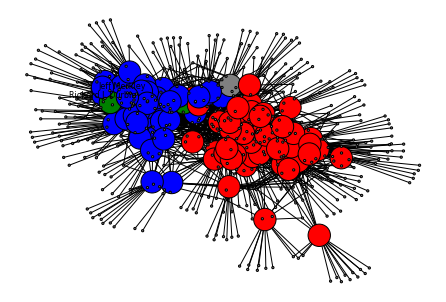

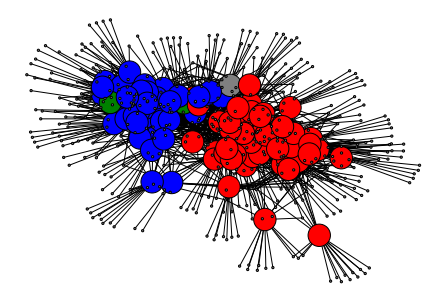

In [ ]:
eig = nx.betweenness_centrality(g)

labels = {}    
for node in g.nodes():
  if node in party_dict.keys() and (node in eig):
    if eig[node] < .008:
      labels[node] = node

print(labels)

nx.draw(g, pos, with_labels=False, node_size=size, edgecolors='black', node_color=color_map)
#Add labels
nx.draw_networkx_labels(g,pos,labels,font_size=8,font_color='black')

plt.figure(1)
plt.show()

nx.draw(g, pos, with_labels=False, node_size=size, edgecolors='black', node_color=color_map)

plt.show()

In [ ]:
#g.nodes()

#centrality = nx.closeness_centrality(g)
#centrality = nx.eigenvector_centrality(g)
centrality = nx.betweenness_centrality(g)
centrality

#voterank = nx.voterank(g)
#voterank

{'Alex Padilla': 0.018684654631957807,
 'Amy Klobuchar': 0.010279494141686872,
 'Angus King': 0.014724735899401943,
 'Ben Ray Luján': 0.0253014220658885,
 'Ben Sasse': 0.02199820740440394,
 'Benjamin L. Cardin': 0.02130785685238657,
 'Bernard Sanders': 0.009356335882819474,
 'Bill Cassidy': 0.019982113165368593,
 'Bill Hagerty': 0.010965924211196933,
 'Bob Casey': 0.013761916385387214,
 'Brian Schatz': 0.02085409891973284,
 'Catherine Cortez Masto': 0.016398469150481286,
 'Charles E. Grassley': 0.021961365625456284,
 'Charles E. Schumer': 0.024558657726552083,
 'Chris Van Hollen': 0.009200227969634468,
 'Christopher A. Coons': 0.012888033928934515,
 'Christopher S. Murphy': 0.01912556386659275,
 'Cindy Hyde-Smith': 0.018387333420153515,
 'Cory Booker': 0.013308454434853113,
 'Cynthia M. Lummis': 0.014416006528847471,
 'Dan Sullivan': 0.028503018029165692,
 'Deb Fischer': 0.02747981598490867,
 'Debbie Stabenow': 0.013649393283647993,
 'Dianne Feinstein': 0.008041480133149708,
 'Edward J

In [ ]:
pagerank = nx.pagerank(g)
pagerank

{'Alex Padilla': 0.004765670434073527,
 'Amy Klobuchar': 0.003858093407644807,
 'Angus King': 0.004333647343032471,
 'Ben Ray Luján': 0.0049293351248350424,
 'Ben Sasse': 0.005784224057435189,
 'Benjamin L. Cardin': 0.004970907388921578,
 'Bernard Sanders': 0.004055278339580197,
 'Bill Cassidy': 0.004964715393720836,
 'Bill Hagerty': 0.004191539707703571,
 'Bob Casey': 0.004273331349128913,
 'Brian Schatz': 0.0047067374257758095,
 'Catherine Cortez Masto': 0.004343267785198361,
 'Charles E. Grassley': 0.004970812421824134,
 'Charles E. Schumer': 0.0053620737149684804,
 'Chris Van Hollen': 0.0038821332592433766,
 'Christopher A. Coons': 0.004149127815464228,
 'Christopher S. Murphy': 0.004548848818886379,
 'Cindy Hyde-Smith': 0.004872178846998013,
 'Cory Booker': 0.004184170704200987,
 'Cynthia M. Lummis': 0.004772915938129782,
 'Dan Sullivan': 0.005850046824246678,
 'Deb Fischer': 0.005673185025124798,
 'Debbie Stabenow': 0.004171309869012396,
 'Dianne Feinstein': 0.004005633714615216,

Issues:


*   Nodes showed up for bills. Had some problems trying to get weighted edges betrween senators with the bills, so I just turned the bill nodes gray and shrank them to make them less obvious.
*   Rate limiting of 5,000 calls per day is in place for the API. While there are ways around this (storing the data over a few days), I decided I would rather stream right from the API. Thus, I went with the cosponsor comparison versus the actual vote comparison.


*   At a few points I had to go back and refactor my code. The description above explains at what points I had to do that (for instance, create a full name and party dictionary). This came in use as I made the graph much easier to read.


*   Overlapping nodes are an eyesore.


*   Mismatch between some senators having a middle name or initial and some senators not. I had to refactor part of the code to not ignore the middle initial so that I can get the graph to properly generate the color and the label. 

*   List item









Limitations:


*   I suspect that a lot of cosponsored bills, while indicative of cooperation, are not necessarily and indication of overall bipartisanship. When you see a network graph of votes, I imagine you still see a larger divide. 
*   This does not show if there is an improvement in divide or a deeper divide over time. This process would need to be recreated for other congresses, however, this code is reusable and it's just a matter of adjusting the API endpoints.







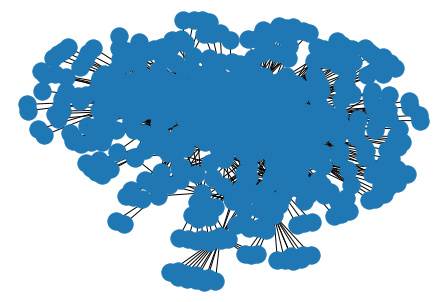

In [ ]:
#nx.draw(g)  
#nx.draw_random(g)  
#nx.draw_circular(g)  
#nx.draw_spectral(g)  
nx.draw_spring(g)